In [31]:
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as scp
import datetime

In [2]:
dataframe = pd.read_csv("train.csv")

In [3]:
dataframe.describe()

,TRIP_ID,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP
count,1.710670e+06,364770.000000,806579.000000,1.710670e+06,1.710670e+06
mean,1.388622e+18,24490.363018,30.272381,2.000035e+07,1.388622e+09
std,9.180944e+15,19624.290043,17.747840,2.112405e+02,9.180944e+06
min,1.372637e+18,2001.000000,1.000000,2.000000e+07,1.372637e+09
25%,1.380731e+18,6593.000000,15.000000,2.000017e+07,1.380731e+09
50%,1.388493e+18,18755.000000,27.000000,2.000034e+07,1.388493e+09
75%,1.396750e+18,40808.000000,49.000000,2.000052e+07,1.396750e+09
max,1.404173e+18,63884.000000,63.000000,2.000098e+07,1.404173e+09


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710670 entries, 0 to 1710669
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   TRIP_ID       int64  
 1   CALL_TYPE     object 
 2   ORIGIN_CALL   float64
 3   ORIGIN_STAND  float64
 4   TAXI_ID       int64  
 5   TIMESTAMP     int64  
 6   DAY_TYPE      object 
 7   MISSING_DATA  bool   
 8   POLYLINE      object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 106.0+ MB


In [10]:
dataframe.head(15)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."
5,1372636965620000231,C,NaN,NaN,20000231,1372636965,A,False,"[[-8.615502,41.140674],[-8.614854,41.140926],[..."
6,1372637210620000456,C,NaN,NaN,20000456,1372637210,A,False,"[[-8.57952,41.145948],[-8.580942,41.145039],[-..."
7,1372637299620000011,C,NaN,NaN,20000011,1372637299,A,False,"[[-8.617563,41.146182],[-8.617527,41.145849],[..."
8,1372637274620000403,C,NaN,NaN,20000403,1372637274,A,False,"[[-8.611794,41.140557],[-8.611785,41.140575],[..."
9,1372637905620000320,C,NaN,NaN,20000320,1372637905,A,False,"[[-8.615907,41.140557],[-8.614449,41.141088],[..."


In [6]:
call_types_count = dataframe['CALL_TYPE'].groupby(dataframe['CALL_TYPE']).count()

<AxesSubplot:title={'center':'Number of Call Types'}, xlabel='CALL_TYPE'>

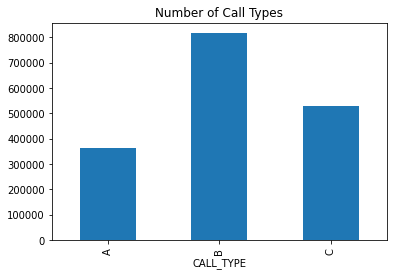

In [7]:
call_types_count.plot.bar(
    title="Number of Call Types",
)

In [8]:
# taxi id diferents
count_dataframe = dataframe["TAXI_ID"].count()
count_taxi_uniques = len(dataframe["TAXI_ID"].unique())

In [9]:
print(f'The number of data in dataframe is {count_dataframe}, while the number of taxis registered is {count_taxi_uniques}.')

The number of data in dataframe is 1710670, while the number of taxis registered is 448.


In [ ]:
# Insign: the most of trips was demanded directly to a taxi driver on a specific stand

In [12]:
dataframe["TIMESTAMP"]

0          1372636858
1          1372637303
2          1372636951
3          1372636854
4          1372637091
              ...    
1710665    1404171463
1710666    1404171367
1710667    1388745716
1710668    1404141826
1710669    1404157147
Name: TIMESTAMP, Length: 1710670, dtype: int64

In [23]:
dataframe["TIMESTAMP_YEAR"] = dataframe["TIMESTAMP"].apply(lambda x: datetime.datetime.fromtimestamp(x).year)

In [32]:
dataframe_groupby_timestamp = dataframe.groupby("TIMESTAMP_YEAR").count()
dataframe_groupby_timestamp

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
TIMESTAMP_YEAR,,,,,,,,,
2013,860048,860048,182117,415679,860048,860048,860048,860048,860048
2014,850622,850622,182653,390900,850622,850622,850622,850622,850622


In [ ]:
# insight: The data in dataset occured in 2013 and 2014

<AxesSubplot:xlabel='TIMESTAMP_YEAR', ylabel='TRIP_ID'>

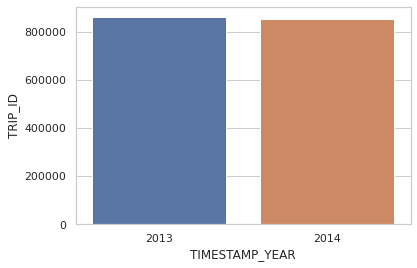

In [48]:
sns.set_theme(style="whitegrid")
sns.barplot(x=dataframe_groupby_timestamp.index, y="TRIP_ID",data=dataframe_groupby_timestamp)

In [26]:
dataframe

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,TIMESTAMP_YEAR
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",2013
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[...",2013
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-...",2013
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",2013
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-...",2013
...,...,...,...,...,...,...,...,...,...,...
1710665,1404171463620000698,C,NaN,NaN,20000698,1404171463,A,False,"[[-8.612469,41.14602],[-8.612487,41.145993],[-...",2014
1710666,1404171367620000670,C,NaN,NaN,20000670,1404171367,A,False,"[[-8.610138,41.140845],[-8.610174,41.140935],[...",2014
1710667,1388745716620000264,C,NaN,NaN,20000264,1388745716,A,False,[],2014
1710668,1404141826620000248,B,NaN,12.0,20000248,1404141826,A,False,"[[-8.630712,41.154885],[-8.63073,41.154813],[-...",2014
